# SEQUENCES

Preliminary imports, you need to run this cell before any other cell in this notebook.

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def plotSequence(y):
    n = np.linspace(0, y.size, y.size)
    plt.scatter(n, y)
    plt.plot([n, n], [np.zeros(n.size), y], color='gray', linestyle="--")
    return

## Discrete time: Sampling a sinusoidal signal

Try different frequencies of the signal and write down what are the min and max values you can recognize the sine wave.

<IPython.core.display.Javascript object>


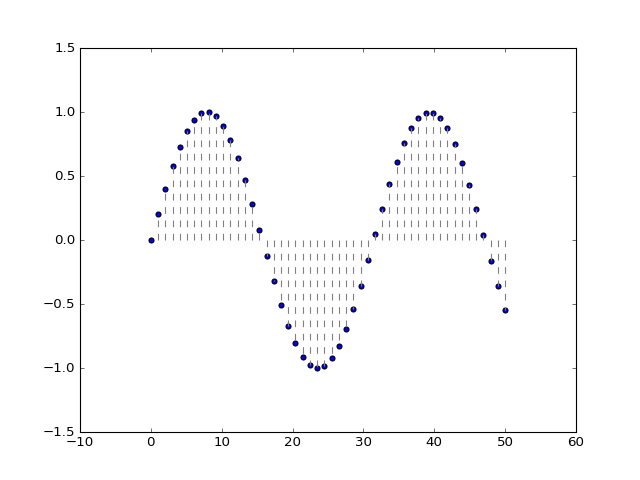

In [4]:
w = 1.0 # frequency in hz = 1/seg

n=np.linspace(0,10)
y = np.sin(w*n)

plt.figure()
plotSequence(y)

# Linear Difference Equations

A linear difference equation(LDE) is written as:

$y[n]  = \lambda y[n-1]$

where $\lambda$ is called the Natural Frequency of the system. Depending on its value, the system modelled with the LDE can be stable or unstable.

In order to solve a LDE, we must provide an initial condition, for instance, typically it is chosen the intial state, say $y[0] = 1$.

Thus, we can obtain any value in the sequence by applying the formula recursively

$y[n] = \lambda y[n-1]$

$y[n-1] = \lambda y[n-2]$

$y[n-2] = \lambda y[n-3]$

$\vdots$

$y[1] = \lambda y[0]$

that is, $y[n] = \lambda (  \lambda ( \lambda ( \dots ( \lambda y[0] ) \dots )))   $ or simply,

$y[n] = \lambda^n y[0]$.

That is, a pair of $\lambda$ and $y[0]$ defines uniquely a solution to ann LDE.

Below there is the definition of an LDE, and interactive plot to play with the influence of $\lambda$

In [7]:
def lde(n, lmbda, f0):
    return f0*pow(lmbda,n);

<IPython.core.display.Javascript object>


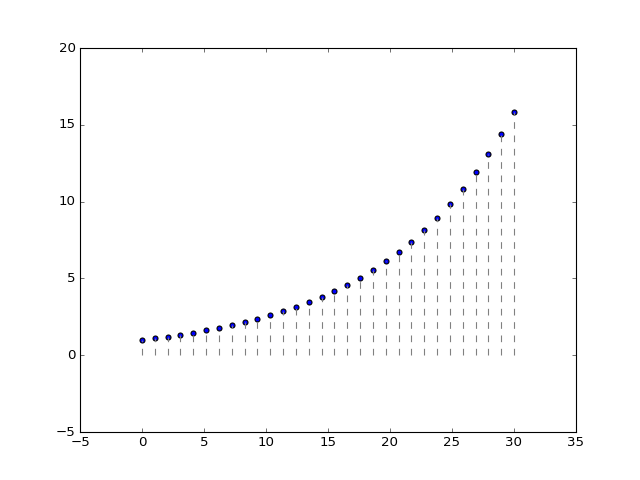

In [95]:
# natural frequency and stability
def f(a):
    N = 30
    f = np.linspace(0,N,N)
    f0 = 1 
    for i in range(N):
        f[i] = lde(i, a, f0)
    plt.figure()
    plotSequence(f)
    
interact(f, a=(-10.0,10.0,0.1))

## Money exercises

Imagine you put 10€ in a bank that gives you 10% interest each year. That interest can be compounded in different time basis. Banks typically use a year compound, that is, each year, it applies the interest to the balance in the account, no matter what happened during the year.

Think that you forget about it, and check the account balance after 30 years, how much money will you have using a year, month, day and hour compound? What do you notice?

### 10% year, year compound

In [71]:
lde(30, 1+(10/100),  10)

174.49402268886448

### 10% per year, month compound

In [72]:
lde(30*12, 1+((10/100)/12), 10)

198.37399373300508

### 10% per year, day compound

In [73]:
lde(30*365, 1+((10/100)/365), 10)

200.7728579550211

### 10% per year, hour compound

In [74]:
lde(30*365*24, 1+((10/100)/(365*24)), 10)

200.85192997914842

The Fibonacci sequence is a second order difference equation, so we need to provide two initial conditions. Check the if statements in the code below.

<IPython.core.display.Javascript object>


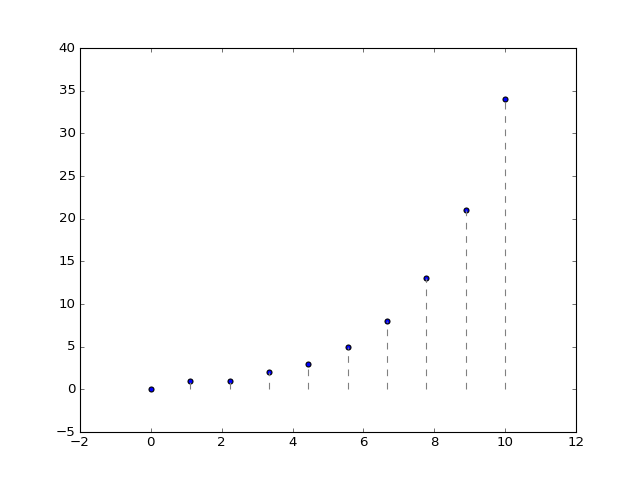

In [8]:
def fibonacci(n):
    if n == 0:   # first initial condition
        return 0
    elif n == 1: # second initial condition
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
   
N = 10
z = np.linspace(0,N,N)
for i in range(N):
    z[i] = fibonacci(i)

plt.figure()
plotSequence(z)